In [7]:
%matplotlib inline

from datetime import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import statsmodels.api as sm

In [9]:
with open('seasons.pickle') as f:
    seasons = pickle.load(f)
for year, season in seasons.iteritems():
    print year,
    season.load_scores()
with open('season2018.pickle') as f:
    season18 = pickle.load(f)
season18.load_scores()

2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017


In [10]:
skaters = {}
for discipline in ('men', 'ladies', 'pairs', 'dance'):
    skaters[discipline] = pd.read_csv('pd_data/results_nowd_nofra15_' + discipline + '.csv')
    skaters[discipline].Date = skaters[discipline].Date.astype('datetime64')

In [81]:
ts = skaters['men'][['Date', 'Points', 'Name']]
ts = ts.set_index('Date')

In [12]:
drop_skater = []
for skater in ts.Name.unique():
    skater_ts = ts[ts.Name == skater]
    if len(skater_ts) < 11 and all(skater_ts.index) < '2014':
        drop_skater.append(skater)
for skater in drop_skater:
    ts = ts[ts.Name != skater]

In [13]:
# from statsmodels.tsa.stattools import adfuller
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolling_mean = timeseries.rolling(window=5, center=False)
#     rolmean = rolling_mean.mean()
#     rolstd = rolling_mean.std()

#     #Plot rolling statistics:
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print 'Results of Dickey-Fuller Test:'
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print dfoutput

In [10]:
# num_obs = {}

In [14]:
# # for skater in ts.Name.unique():
#     print
#     print skater
#     skater_ts = ts[ts.Name == skater].Points
#     ewa = pd.ewma(skater_ts, halflife=5)
#     moving_avg = pd.rolling_mean(skater_ts, 5)
#     diff = skater_ts - ewa
#     diff.dropna(inplace=True)
#     test_stationarity(diff)
#     plt.show()
#     num_obs[skater] = len(skater_ts)

In [84]:
skater = 'Shoma UNO'
skater_ts = ts[ts.Name == skater].Points
# ewa = skater_ts.ewm(halflife=5, ignore_na=False, min_periods=0, adjust=True).mean()
# # moving_avg = pd.rolling_mean(skater_ts, 5)
# diff = skater_ts - ewa
# diff.dropna(inplace=True)
# test_stationarity(diff)
# plt.show()

In [76]:
import itertools

# define the p, d and q parameters to take any value between 0 and 2
p = d = q = xrange(0, 3)
 
# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
pdq = [x for x in pdq if x[0] != 0]

# generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [86]:
import sys

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(skater_ts,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            print "Unexpected error:", sys.exc_info()[0]
            continue
print "Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic)

Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <t

/anaconda/lib/python2.7/site-packages/statsmodels/tsa/statespace/sarimax.py:928: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <t

In [55]:
mdl = sm.tsa.statespace.SARIMAX(skater_ts.values,
                                order=(2, 1, 1),
                                seasonal_order=(1, 2, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
res = mdl.fit()

In [56]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   40
Model:             SARIMAX(2, 1, 1)x(1, 2, 0, 12)   Log Likelihood                 -71.563
Date:                            Fri, 09 Mar 2018   AIC                            153.127
Time:                                    09:28:13   BIC                            161.571
Sample:                                         0   HQIC                           156.180
                                             - 40                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2726      0.316     -0.862      0.389      -0.893       0.347
ar.L2         -0.5142      0.254     -2.022      0.043      -1.013      -0.016
ma.L1         -0.9908     10.312     -0.096      0.923     -21.201      19.220
ar.S.L12      -0.2133      0.668     -0.319      0.750      -1.523       1.096
sigma2       587.1905   5910.274      0.099      0.921    -1.1e+04    1.22e+04
===================================================================================
Ljung-Box (Q):                        7.46   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.92   Prob(JB):                         0.64
Heteroskedasticity (H):               0.23   Skew:                            -0.41
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
from scipy.stats import chi2
chi2.isf(q=0.05, df=40-5)

49.801849568201831

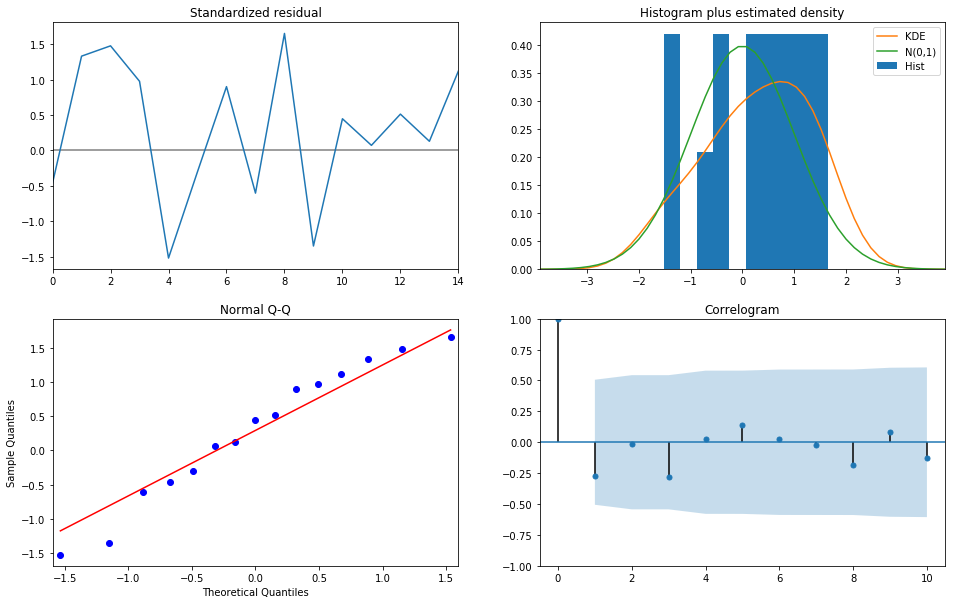

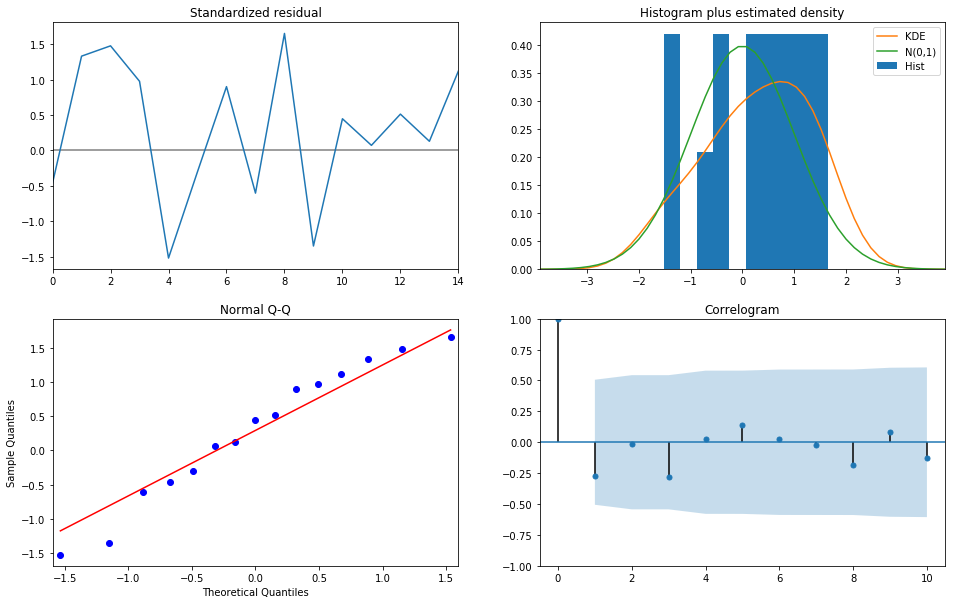

In [57]:
res.plot_diagnostics(figsize=(16, 10))

In [72]:
pred = res.get_forecast(steps=5)
pred.predicted_mean

array([ 309.04084969,  262.61349004,  284.48467221,  278.77804546,
        252.26040447])

In [73]:
new_results = pd.read_csv('pd_data/results18_men.csv')

In [74]:
new_results[new_results.Name == 'Patrick CHAN']

,Unnamed: 0,Rank,Event,Date,Name,Nation,Points,Short Rank,Short Score,Free Rank,Free Score,Short Start,Free Start,Num Short Scorecards,Num Free Scorecards
15,3,4,gpcan2017,2017-10-29,Patrick CHAN,CAN,245.7,2,94.43,7,151.27,11,11.0,12,12


In [18]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(diff, nlags=20)
lag_pacf = pacf(diff, nlags=20, method='ols')

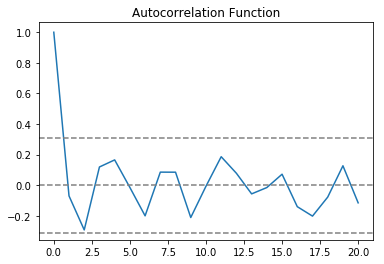

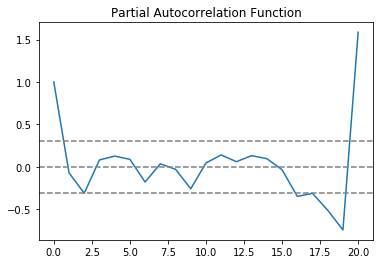

In [29]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

In [31]:
from statsmodels.tsa.arima_model import ARIMA

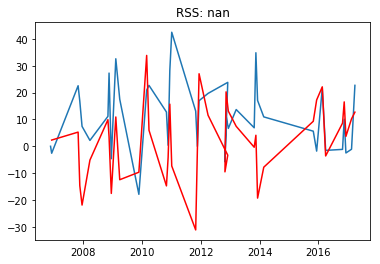

In [33]:
model = ARIMA(skater_ts, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff)**2))

In [34]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Date
2006-12-03     2.311916
2007-10-28     5.272989
2007-11-18   -14.678835
2007-12-16   -21.894426
2008-03-23    -5.150524
dtype: float64


In [35]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Date
2006-12-03     2.311916
2007-10-28     7.584905
2007-11-18    -7.093930
2007-12-16   -28.988356
2008-03-23   -34.138880
dtype: float64
